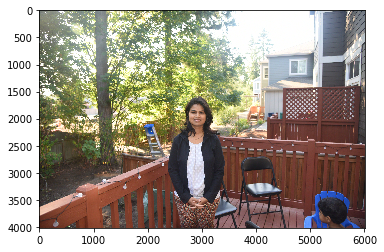

In [1]:
from matplotlib import pyplot,image

shanthiPic = '/src/shanthiPictures/101ND750/DSC_0181.JPG'
img = image.imread(shanthiPic)
imgplot=pyplot.imshow(img)
pyplot.show()

In [15]:
import hashlib
def calculateMD5Hash(file):
    fh = open(file, "rb")
    return hashlib.md5(fh.read()).hexdigest()
    

shanthiPic = '/src/data/testPythonDuplicateFinder/2015-09/IMG_1313.JPG'
print(calculateMD5Hash(shanthiPic))


4bbf943719c3f471c2da85931c02b094


In [1]:
from notebook import notebookapp
servers = list(notebookapp.list_running_servers())
print (len(servers))
print (servers)

1
[{'base_url': '/', 'hostname': 'localhost', 'notebook_dir': '/src/ipynb', 'password': False, 'pid': 32, 'port': 8888, 'secure': False, 'token': 'fd7ad8c49df0ff1d60b91ed0bf7b2fcaa77f25d2a3af4b63', 'url': 'http://localhost:8888/'}]


In [3]:
from os import walk as oswalk
from os.path import join as osjoin
from time import time
inputPath = '/src/data/testPythonDuplicateFinder'
startTime = time()
for root, dirs, files in oswalk(inputPath):
    if files:
        print (calculateMD5Hash(osjoin(root,files[0])))
        print (calculateMD5Hash(osjoin(root,files[-1])))

print('Took {}s'.format(time() - startTime))
        


fc345789d92aae5ddb13116724b06d7b
3feac30102c6d09c0fb412d09ac0401b
b58ba05fbee20e4d07f8b5fc29f2f283
4837f5803fe5560205c594a928afd0d6
44e688ca7b7834d22e3af22232a2a343
ad485c2888318edf7cd4df80e0cb88f0
1e038cb8da046276301c7987e4fd5e89
b8bb67d6c976af538b924c0779329083
Took 0.04008913040161133s


In [23]:
### List Extention ###
from os import walk as oswalk
from os.path import join as osjoin
from time import time
inputPath = '/src/data/testPythonDuplicateFinder'
startTime = time()
imageHashes = []
images =[]
for root, dirs, files in oswalk(inputPath):
    images = [osjoin(root, f) for f in files]
    imageHashes.extend([(image, calculateMD5Hash(image)) for image in images])

print('Took {}s for {} images'.format(time() - startTime, len(imageHashes)))
print ('images {}'.format(len(images)))


Took 10.068264961242676s for 423 images
images 274


In [57]:
import concurrent.futures
from os import walk as oswalk
from os.path import join as osjoin
from time import time
import hashlib
def calculateMD5Hash(file):
    fh = open(file, "rb")
    return hashlib.md5(fh.read()).hexdigest()
    
inputPaths = ['/src/data/testPythonDuplicateFinder']
duplicatesPath = '/src/data/duplicates'
inputImages = []
for inputPath in inputPaths:
    for root, dirs, files in oswalk(inputPath):
        inputImages.extend(img for img in [osjoin(root, f) for f in files] if img not in inputImages)


startTime = time()
# We can use a with statement to ensure threads are cleaned up promptly
with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
    # Start the load operations and mark each future with its URL
    future_to_file = {executor.submit(calculateMD5Hash, inputFile): inputFile for inputFile in inputImages}
    imageHashMap = {}
    for future in concurrent.futures.as_completed(future_to_file):
        file = future_to_file[future]
        try:
            md5Hash = future.result()
            
        except Exception as exc:
            print('%r generated an exception: %s' % (file, exc))
        else:
            if md5Hash in imageHashMap: 
                imageHashMap[md5Hash].extend([file])
            else:
                imageHashMap[md5Hash] = [file]

print (imageHashMap)
print('Took {}s for  {} images'.format(time() - startTime, len(inputImages)))


{'0ea61a7875474ec1b3bc958c0e401491': ['/src/data/testPythonDuplicateFinder/2015-11/IMG_1489.JPG'], 'e3c816a65975abc0fefa0db269c9ede0': ['/src/data/testPythonDuplicateFinder/2015-11/IMG_1485.JPG'], '9bda60ad5edf1d56c888ada32c42af83': ['/src/data/testPythonDuplicateFinder/2015-11/IMG_1484.JPG'], '548f6a3383feb512f7af9d6aba76bb43': ['/src/data/testPythonDuplicateFinder/2015-11/IMG_1480.JPG'], 'fc345789d92aae5ddb13116724b06d7b': ['/src/data/testPythonDuplicateFinder/2015-11/IMG_1490.JPG'], '069c2ffc01af43ebb0f2899e15af1c7c': ['/src/data/testPythonDuplicateFinder/2015-11/IMG_1482.JPG'], '9d5bac4f39d1cbfff9dda68e6ebb0c2f': ['/src/data/testPythonDuplicateFinder/2015-11/IMG_1486.JPG'], 'c688e3a525ac919229a29fa92761dbdd': ['/src/data/testPythonDuplicateFinder/2015-11/IMG_1483.JPG'], 'ae8f9bbda3bebebbba9ff2562b66d9dd': ['/src/data/testPythonDuplicateFinder/2015-11/IMG_1480.MOV'], '456637a35f489da3433fdd4316562ac1': ['/src/data/testPythonDuplicateFinder/2015-11/IMG_1481.JPG'], 'b58ba05fbee20e4d07

In [61]:
for key, value in imageHashMap.items():
    print (key, end=', ')
    for file in value:
        print(file, end=', ')
    print()
print (len(imageHashMap))

0ea61a7875474ec1b3bc958c0e401491, /src/data/testPythonDuplicateFinder/2015-11/IMG_1489.JPG, 
e3c816a65975abc0fefa0db269c9ede0, /src/data/testPythonDuplicateFinder/2015-11/IMG_1485.JPG, 
9bda60ad5edf1d56c888ada32c42af83, /src/data/testPythonDuplicateFinder/2015-11/IMG_1484.JPG, 
548f6a3383feb512f7af9d6aba76bb43, /src/data/testPythonDuplicateFinder/2015-11/IMG_1480.JPG, 
fc345789d92aae5ddb13116724b06d7b, /src/data/testPythonDuplicateFinder/2015-11/IMG_1490.JPG, 
069c2ffc01af43ebb0f2899e15af1c7c, /src/data/testPythonDuplicateFinder/2015-11/IMG_1482.JPG, 
9d5bac4f39d1cbfff9dda68e6ebb0c2f, /src/data/testPythonDuplicateFinder/2015-11/IMG_1486.JPG, 
c688e3a525ac919229a29fa92761dbdd, /src/data/testPythonDuplicateFinder/2015-11/IMG_1483.JPG, 
ae8f9bbda3bebebbba9ff2562b66d9dd, /src/data/testPythonDuplicateFinder/2015-11/IMG_1480.MOV, 
456637a35f489da3433fdd4316562ac1, /src/data/testPythonDuplicateFinder/2015-11/IMG_1481.JPG, 
b58ba05fbee20e4d07f8b5fc29f2f283, /src/data/testPythonDuplicateFinder/

In [62]:
import json
imageHashMapJson = json.JSONEncoder(sort_keys=True, indent=0).encode(imageHashMap)
print (imageHashMapJson)
with open('/src/data/fileHashes.json', 'w') as jsonFile:
    jsonFile.write(imageHashMapJson)

#json.dump(imageHashMap, '/src/data/fileHashes.json')

{
"005438413bfefeb65c37db169729c465": [
"/src/data/testPythonDuplicateFinder/2015-09 (copy)/IMG_0718.JPG",
"/src/data/testPythonDuplicateFinder/2015-09/IMG_0718.JPG"
],
"013b87604659c8c607b867c2ea804580": [
"/src/data/testPythonDuplicateFinder/2015-09 (copy)/IMG_0788.JPG",
"/src/data/testPythonDuplicateFinder/2015-09/IMG_0788.JPG"
],
"0202443dacb5f5b056a5a756266517a4": [
"/src/data/testPythonDuplicateFinder/2015-09 (copy)/IMG_0744.MOV",
"/src/data/testPythonDuplicateFinder/2015-09/IMG_0744.MOV"
],
"044ba9d89b2c944ab064c8e584da187c": [
"/src/data/testPythonDuplicateFinder/2015-09 (copy)/IMG_1329.JPG",
"/src/data/testPythonDuplicateFinder/2015-09/IMG_1329.JPG"
],
"048a12c23d4ee847ac7b6bd7778b7f45": [
"/src/data/testPythonDuplicateFinder/2015-09 (copy)/IMG_0851.JPG",
"/src/data/testPythonDuplicateFinder/2015-09/IMG_0851.JPG"
],
"04a6e6860e4dace7588f6bcc36c588f9": [
"/src/data/testPythonDuplicateFinder/2015-07/IMG_0467.JPG"
],
"057baa31351a0a2598eed6125e486107": [
"/src/data/testPythonDupl

In [68]:
import imghdr
print(imghdr.what('/src/data/testPythonDuplicateFinder/2015-07/IMG_0441.JPG'))
print(imghdr.what('/src/data/fileHashes.json'))

jpeg
None
